In [1]:
import matplotlib.pyplot as plt
from igp2 import Map, plot_map
from igp2.data.scenario import ScenarioConfig, InDScenario
from ogrit.core.base import get_scenarios_dir
from ogrit.core.goal_generator import GoalGenerator


In [2]:
cd ../..

/home/cillian/phd/projects/OGRIT


In [3]:
scenario_name = 'rdb5'
episode_idx = 0
config = ScenarioConfig.load(get_scenarios_dir() + f"configs/{scenario_name}.json")
scenario_map = Map.parse_from_opendrive(get_scenarios_dir() + f"maps/{scenario_name}.xodr")
scenario = InDScenario(config)
episode = scenario.load_episode(episode_idx)

Boundary of road ID 74 is not a closed a loop!
Boundary of road ID 648 is not a closed a loop!
Boundary of road ID 1062 is not a closed a loop!
Boundary of road ID 1359 is not a closed a loop!
Boundary of road ID 74 is not a closed a loop!
Boundary of road ID 648 is not a closed a loop!
Boundary of road ID 1062 is not a closed a loop!
Boundary of road ID 1359 is not a closed a loop!


[Lane(id=-1) on Road(id=1535)]


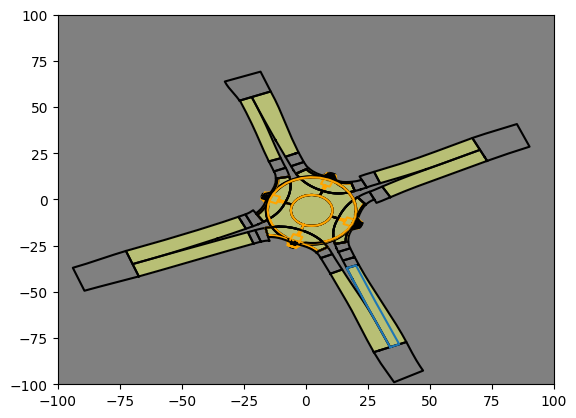

In [4]:
plot_map(scenario_map)
lanes = scenario_map.lanes_at((24.0, -46.9), max_distance=0.01)
print(lanes)
lane = lanes[0]
x, y = lane.boundary.exterior.xy
plt.plot(x, y)

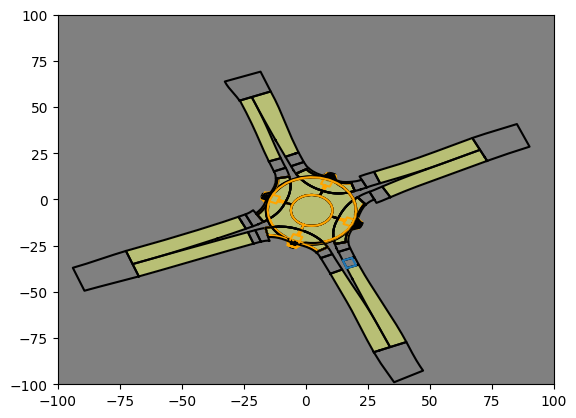

In [5]:
next_lane = lane.link.successor[0]

plot_map(scenario_map)
x, y = next_lane.boundary.exterior.xy
plt.plot(x, y)

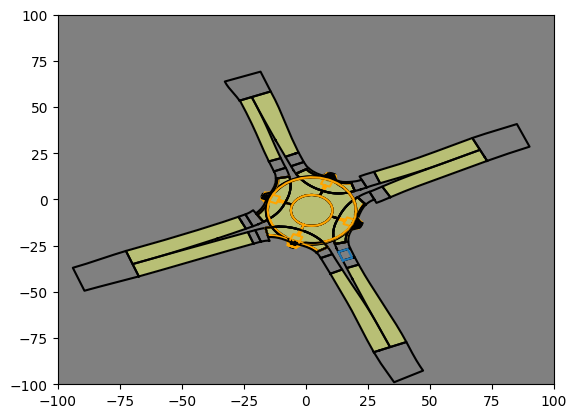

In [6]:
lane3 = next_lane.link.successor[0]

plot_map(scenario_map)
x, y = lane3.boundary.exterior.xy
plt.plot(x, y)

[Lane(id=-1) on Road(id=8)]


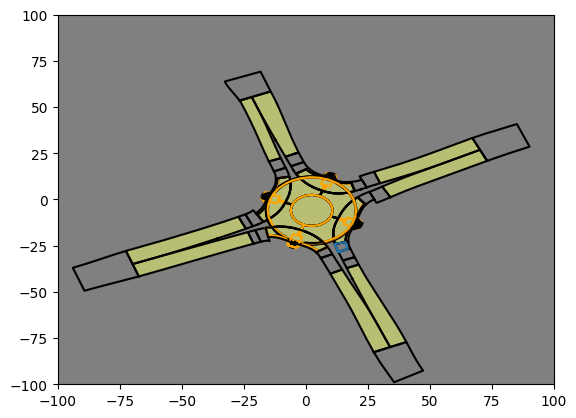

In [7]:
successors = lane3.link.successor
print(successors)
lane4 = successors[0]

plot_map(scenario_map)
x, y = lane4.boundary.exterior.xy
plt.plot(x, y)

[Lane(id=-1) on Road(id=32), Lane(id=-1) on Road(id=74), Lane(id=-1) on Road(id=178), Lane(id=-1) on Road(id=246), Lane(id=-1) on Road(id=301)]


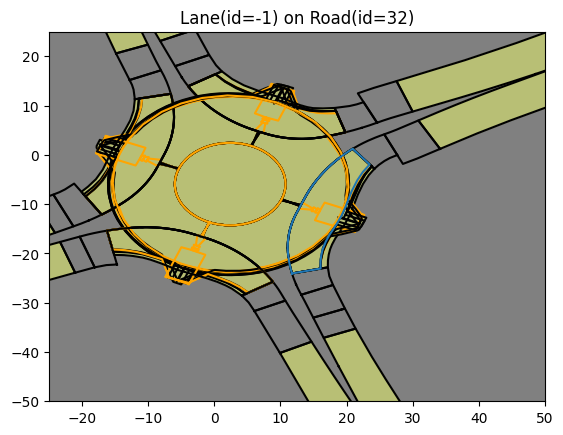

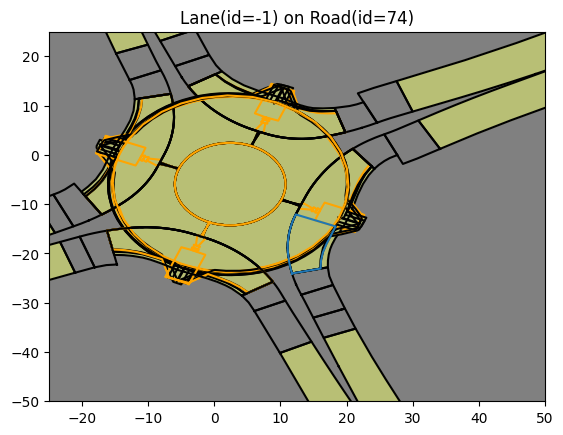

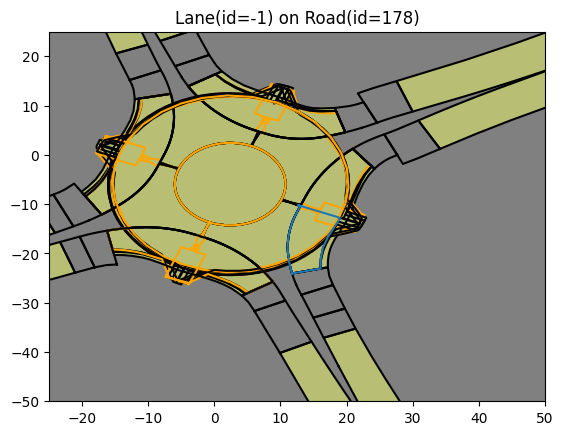

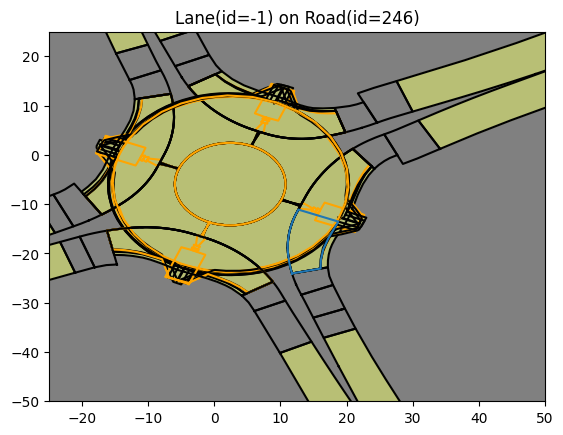

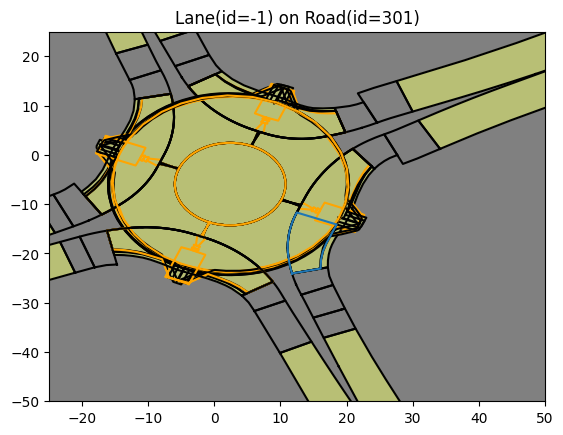

In [8]:
successors = lane4.link.successor
print(successors)

for l in successors:
    plot_map(scenario_map)
    x, y = l.boundary.exterior.xy
    plt.plot(x, y)
    plt.title(str(l))
    plt.xlim([-25, 50])
    plt.ylim([-50, 25])

lane5 = successors[2]

[Lane(id=-4) on Road(id=178)]


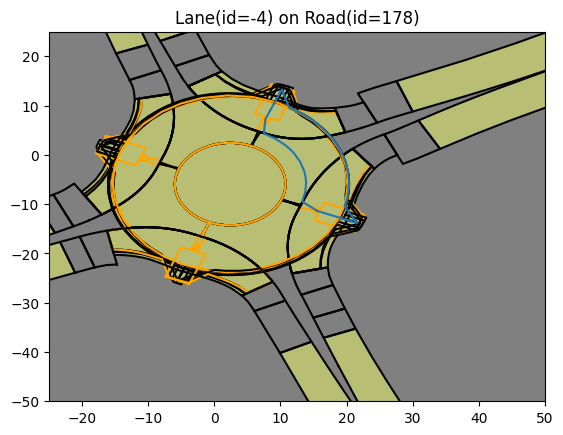

In [9]:
successors = lane5.link.successor
lane6 = successors[0]
print(successors)

for l in successors:
    plot_map(scenario_map)
    x, y = l.boundary.exterior.xy
    plt.plot(x, y)
    plt.title(str(l))
    plt.xlim([-25, 50])
    plt.ylim([-50, 25])


In [10]:
lane6.parent_road.junction.get_all_roads()

[Road 32 from [ 11.74812815 -24.06787554] with length 28.255805660508386,
 Road 74 from [ 11.74812815 -24.06787554] with length 100.5291373943542,
 Road 178 from [ 11.74812815 -24.06787554] with length 46.58451982946602,
 Road 246 from [ 11.74812815 -24.06787554] with length 64.26448595587823,
 Road 301 from [ 11.74812815 -24.06787554] with length 82.77376009698602,
 Road 397 from [19.82288786  4.58096268] with length 81.77895248665504,
 Road 474 from [-6.57544823 12.39671623] with length 64.5885727316751,
 Road 527 from [-16.2243141  -15.37346949] with length 46.794479181909566,
 Road 648 from [19.82288786  4.58096268] with length 100.10766665561268,
 Road 736 from [19.82288786  4.58096268] with length 27.83433492176689,
 Road 781 from [19.82288786  4.58096268] with length 45.514301048179085,
 Road 833 from [19.82288786  4.58096268] with length 64.02357518928689,
 Road 936 from [-6.57544823 12.39671623] with length 82.91728690063273,
 Road 1018 from [-16.2243141  -15.37346949] with le

[Lane(id=-1) on Road(id=178)]


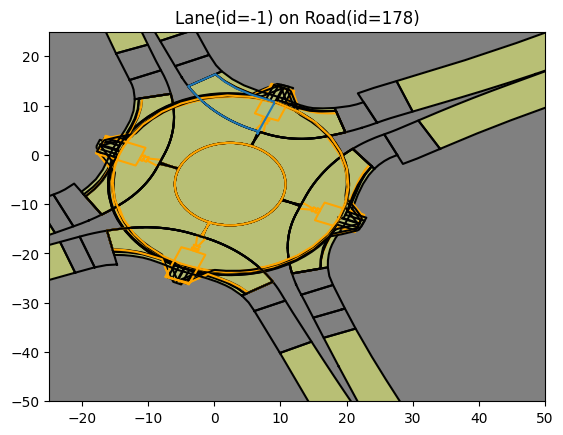

In [11]:
successors = lane6.link.successor
lane7 = successors[0]
print(successors)

for l in successors:
    plot_map(scenario_map)
    x, y = l.boundary.exterior.xy
    plt.plot(x, y)
    plt.title(str(l))
    plt.xlim([-25, 50])
    plt.ylim([-50, 25])


In [28]:
lane7.parent_road.junction.roads[0].lanes.lane_sections[0].all_lanes

[Lane(id=0) on Road(id=32),
 Lane(id=-1) on Road(id=32),
 Lane(id=-2) on Road(id=32),
 Lane(id=-3) on Road(id=32)]

[Lane(id=-1) on Road(id=29)]


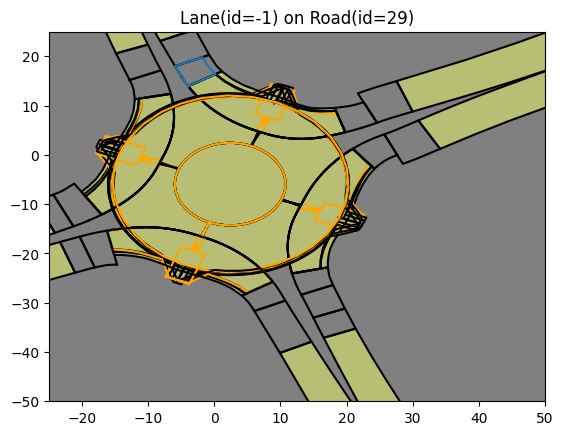

In [12]:
successors = lane7.link.successor
lane8 = successors[0]
print(successors)

for l in successors:
    plot_map(scenario_map)
    x, y = l.boundary.exterior.xy
    plt.plot(x, y)
    plt.title(str(l))
    plt.xlim([-25, 50])
    plt.ylim([-50, 25])

But goal was not generated for this path

In [13]:
goals = GoalGenerator.generate_goals_from_lane(lane4, scenario_map)

(22.208540032062363, -0.3540549069772978)
(15.32955649471192, -13.301890760572759)
(15.673109310479681, -11.420964415209054)
(15.72810544482603, -12.319696839968259)
(15.484454301365886, -12.911208448548685)


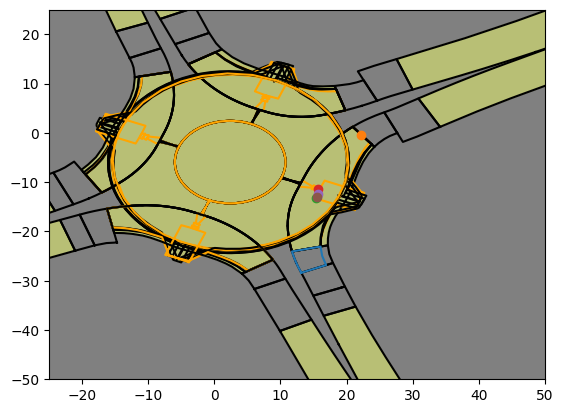

In [14]:
plot_map(scenario_map)
x, y = lane4.boundary.exterior.xy
plt.plot(x, y)
plt.xlim([-25, 50])
plt.ylim([-50, 25])

for goal in goals:
    print(goal.goal.center.coords[0])
    plt.plot(*goal.goal.center.coords[0], 'o')

In [15]:
goals

[TypedGoal(goal_type='exit-right', goal=PointGoal(center=[22.209 -0.354], r=3.5), lane_path=[Lane(id=-1) on Road(id=8), Lane(id=-1) on Road(id=32)]),
 TypedGoal(goal_type='exit-right', goal=PointGoal(center=[ 15.33  -13.302], r=3.5), lane_path=[Lane(id=-1) on Road(id=8), Lane(id=-1) on Road(id=74)]),
 TypedGoal(goal_type='exit-right', goal=PointGoal(center=[ 15.673 -11.421], r=3.5), lane_path=[Lane(id=-1) on Road(id=8), Lane(id=-1) on Road(id=178)]),
 TypedGoal(goal_type='exit-right', goal=PointGoal(center=[ 15.728 -12.32 ], r=3.5), lane_path=[Lane(id=-1) on Road(id=8), Lane(id=-1) on Road(id=246)]),
 TypedGoal(goal_type='exit-right', goal=PointGoal(center=[ 15.484 -12.911], r=3.5), lane_path=[Lane(id=-1) on Road(id=8), Lane(id=-1) on Road(id=301)])]

In [31]:
scenario_map.junctions

{30: <igp2.opendrive.elements.junction.Junction at 0x7f0d28730ca0>,
 1505: <igp2.opendrive.elements.junction.Junction at 0x7f0d28730d00>,
 1516: <igp2.opendrive.elements.junction.Junction at 0x7f0d28738310>,
 1527: <igp2.opendrive.elements.junction.Junction at 0x7f0d28738580>,
 1538: <igp2.opendrive.elements.junction.Junction at 0x7f0d28738970>}

In [37]:
scenario_map.junctions[1516].get_all_roads()

[Road 1517 from [-21.77433605  55.42223342] with length 35.04588729322073,
 Road 1522 from [-21.77433605  55.42223342] with length 35.08081955295006]

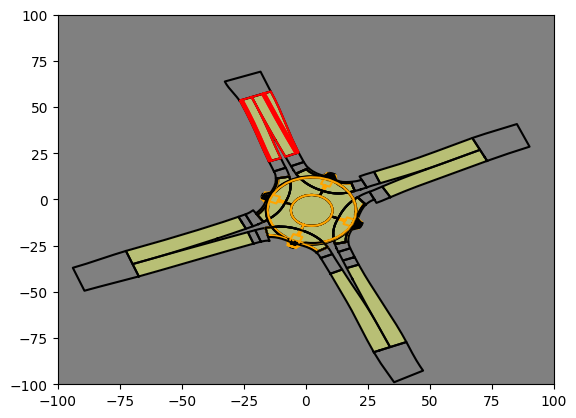

In [36]:
plot_map(scenario_map)
for rd in scenario_map.junctions[1516].roads:
    for ls in rd.lanes.lane_sections:
        for l in ls.all_lanes:
            x, y = l.boundary.exterior.xy
            plt.plot(x, y, 'r')
#plt.xlim([-25, 50])
#plt.ylim([-50, 25])